In [1]:
import pandas as pd
import numpy as np
import wrds
import math
import matplotlib.pyplot as plt
from pandas import DatetimeIndex

In [2]:
db = wrds.Connection()

Enter your WRDS username [Hatricano]:rkarthick1997
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [25]:
# db.list_libraries()
# db.list_tables(library='crsp')

In [18]:
# sp_returns = db.raw_sql("""

# select caldt, vwretd adj_return from crsp.dsp500
# where caldt between '1980-01-01' and '2021-07-01'

#                         """, 
#                      date_cols=['date'])

# sp_returns.to_excel('sp_returns.xlsx',index = False)

sp_returns = pd.read_excel('sp_returns.xlsx')
sp_returns['Total_return_log'] = np.log((sp_returns['adj_return']+1).cumprod())
sp_returns.set_index(['caldt'], inplace = True)
sp_returns.head()

,adj_return,Total_return_log
caldt,,
1980-01-02,-0.020016,-0.020219
1980-01-03,-0.004558,-0.024788
1980-01-04,0.012308,-0.012555
1980-01-07,0.003118,-0.009442
1980-01-08,0.021196,0.011532


In [7]:
# Getting 10 year - 2 year treasury return from https://fred.stlouisfed.org/series/T10Y2Y

treasury_return = pd.read_excel('T10Y2Y.xls')
treasury_return.dropna(inplace = True)
treasury_return.head()

,observation_date,T10Y2Y
0,1980-01-02,-0.89
1,1980-01-03,-0.85
2,1980-01-04,-0.81
3,1980-01-07,-0.72
4,1980-01-08,-0.69


In [73]:
def date_filter(s):
    if s in treasury_return['Calendar Date'].values:
        return True
    else:
        return False

sp_returns = sp_returns[sp_returns['caldt'].map(date_filter)]
sp_returns.head()

,caldt,adj_return,Total_return_log
24,1950-01-31,0.001087,0.019587
46,1950-02-28,-0.003401,0.038982
73,1950-03-31,-0.000279,0.047045
96,1950-04-28,0.004285,0.085031
123,1950-05-31,0.003636,0.137826


In [19]:
curve_inversion1 = treasury_return[treasury_return['T10Y2Y']<0]['observation_date'].values

In [25]:
# NBER Recession Data Peak to Trough https://fred.stlouisfed.org/series/USRECM

recession = pd.read_excel('USRECM.xls')
recession

,observation_date,USRECM
0,1980-01-01,1980-07-01
1,1981-07-01,1982-11-01
2,1990-07-01,1991-03-01
3,2001-03-01,2001-11-01
4,2007-12-01,2009-06-01
5,2020-02-01,2020-04-01


In [35]:
recession.iloc[0]['USRECM']

Timestamp('1980-07-01 00:00:00')

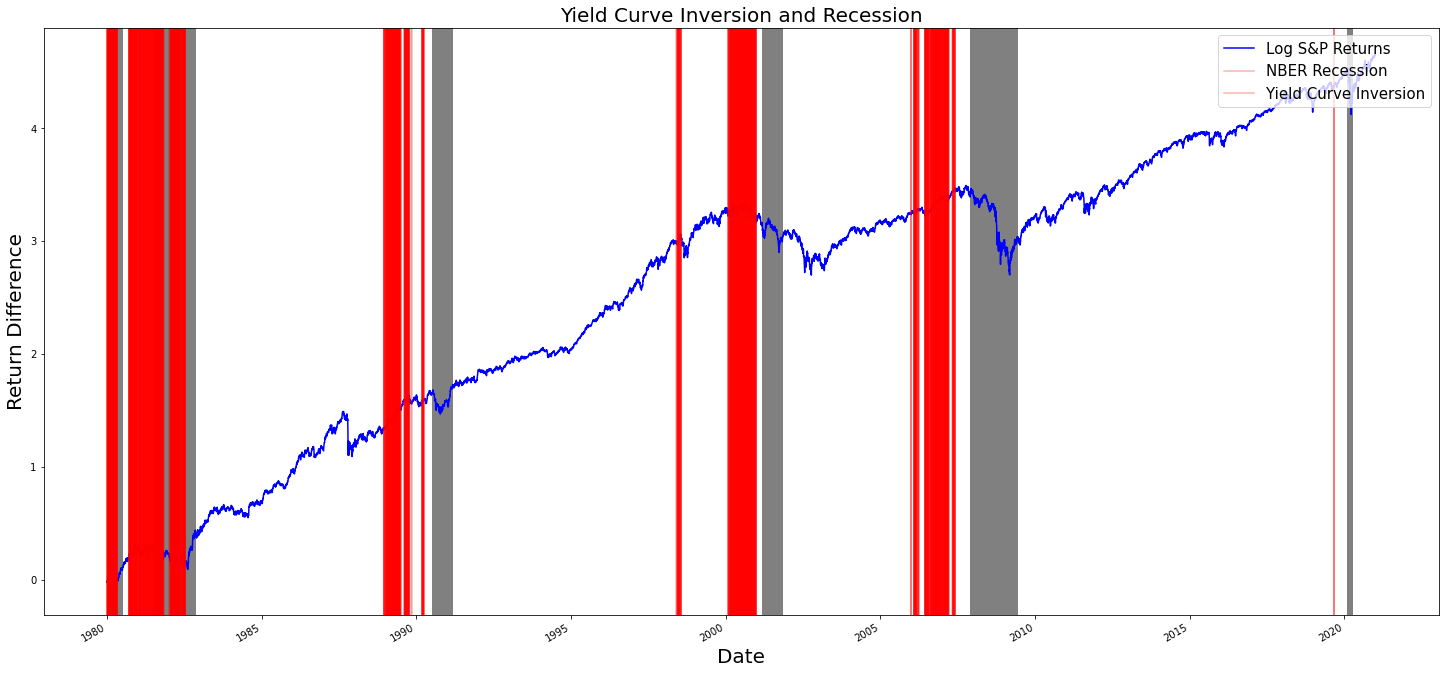

In [54]:
# treasury_return.set_index(['Calendar Date'],inplace =True)
# sp_returns.set_index(['caldt'],inplace = True)

fig, ax1 = plt.subplots(figsize=(25,12))
plt.title('Return vs Year')
sp_returns['Total_return_log'].plot(kind='line', marker=None, color ='blue', label = 'Log S&P Return')

for i in range(len(recession)):
    plt.axvspan(recession.iloc[i]['observation_date'], recession.iloc[i]['USRECM'], alpha=1, color='grey')

for i in curve_inversion1:
    plt.axvline(x=i, color = 'red', alpha = 0.3)

plt.xlabel('Date', fontsize = 20)
plt.ylabel('Return Difference', fontsize = 20)
plt.title('Yield Curve Inversion and Recession', fontsize = 20)
plt.legend(['Log S&P Returns','NBER Recession','Yield Curve Inversion'],loc ="upper right", fontsize = 15)
plt.show()